In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [2]:
df = pd.read_csv('/Users/zhangwenlan/Downloads/Tongji_RA/Data/Process/Processed/9RPoints/Processed/Sum1.csv')
print(df.columns)

Index(['FileID', 'StopID', 'Car Plate', 'StartRow', 'EndRow', 'StartTime',
       'EndTime', 'Duration(min)', 'Time Delta', 'MeanLat', 'MeanLon',
       'Distance(m)', 'Location', 'SpeedBeforePark', 'TrueStop', 'Distance',
       'Quantity', 'TrueStopFixed', 'CourseChangeTest', '500m', '3Class'],
      dtype='object')


## Missing Data

In [3]:
df.dtypes
# how to check no NA value?

FileID                int64
StopID                int64
Car Plate            object
StartRow              int64
EndRow                int64
StartTime            object
EndTime              object
Duration(min)         int64
Time Delta          float64
MeanLat             float64
MeanLon             float64
Distance(m)         float64
Location             object
SpeedBeforePark     float64
TrueStop              int64
Distance            float64
Quantity            float64
TrueStopFixed         int64
CourseChangeTest    float64
500m                  int64
3Class                int64
dtype: object

In [4]:
# Check rows with missing data
df[df.isna().any(axis=1)]

,FileID,StopID,Car Plate,StartRow,EndRow,StartTime,EndTime,Duration(min),Time Delta,MeanLat,...,Distance(m),Location,SpeedBeforePark,TrueStop,Distance,Quantity,TrueStopFixed,CourseChangeTest,500m,3Class


In [5]:
print(df.isnull())

       FileID  StopID  Car Plate  StartRow  EndRow  StartTime  EndTime  \
0       False   False      False     False   False      False    False   
1       False   False      False     False   False      False    False   
2       False   False      False     False   False      False    False   
3       False   False      False     False   False      False    False   
4       False   False      False     False   False      False    False   
...       ...     ...        ...       ...     ...        ...      ...   
41630   False   False      False     False   False      False    False   
41631   False   False      False     False   False      False    False   
41632   False   False      False     False   False      False    False   
41633   False   False      False     False   False      False    False   
41634   False   False      False     False   False      False    False   

       Duration(min)  Time Delta  MeanLat  ...  Distance(m)  Location  \
0              False       False    Fa

In [6]:
# Extract columns that contain at least one missing value:
print(df.loc[:, df.isnull().any()])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[41635 rows x 0 columns]


In [7]:
# Extract rows that contain at least one missing value:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [FileID, StopID, Car Plate, StartRow, EndRow, StartTime, EndTime, Duration(min), Time Delta, MeanLat, MeanLon, Distance(m), Location, SpeedBeforePark, TrueStop, Distance, Quantity, TrueStopFixed, CourseChangeTest, 500m, 3Class]
Index: []

[0 rows x 21 columns]


## Split dataset & Scale

In [16]:
# Format data1: X and Y - Split into Dependent and Independent Variables
X = df[['Duration(min)', '500m', 'SpeedBeforePark']].copy()
# df_new = df[['Duration(min)','500m', 'SpeedBeforePark']]
Y = df['TrueStopFixed'].copy()

## K-fold

In [17]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)   # random_state
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, Y):
    # select rows
    train_data, test_data = X.iloc[train_ix], X.iloc[test_ix]
    train_label, test_label = Y.iloc[train_ix], Y.iloc[test_ix]
    # summarize train and test composition
    train_neg, train_pos = len(train_label[train_label == 0]), len(train_label[train_label == 1])
    test_neg, test_pos = len(test_label[test_label == 0]), len(test_label[test_label == 1])
    print('>Train: Train Negative = %d, Train Positive = %d, Test Negative = %d, Test Positive = %d' % (
        train_neg, train_pos, test_neg, test_pos))

>Train: Train Negative = 32915, Train Positive = 393, Test Negative = 8229, Test Positive = 98
>Train: Train Negative = 32915, Train Positive = 393, Test Negative = 8229, Test Positive = 98
>Train: Train Negative = 32915, Train Positive = 393, Test Negative = 8229, Test Positive = 98
>Train: Train Negative = 32915, Train Positive = 393, Test Negative = 8229, Test Positive = 98
>Train: Train Negative = 32916, Train Positive = 392, Test Negative = 8228, Test Positive = 99


In [13]:
train_data

,Duration(min),500m,SpeedBeforePark
0,52,1,0.00
1,0,1,2.75
2,30,0,11.35
3,24,1,48.55
4,16,0,30.45
...,...,...,...
41628,0,13,2.60
41629,0,0,44.75
41630,0,0,9.15
41631,0,2,5.45


## Centering and Scaling  
The Radial Basis Functon (RBF) assumes data are centered and scaled, 
each colume should have a mean value = 0, and a standard deviation = 1

split data to training and testing datasets first (X_train, X_test, Y_train, Y_text)
then scale sparately to avoid Data Leakage (occurs when information about the training dataset currupts or influences the testing dataset).   
https://www.youtube.com/watch?v=8A7L0GsBiLQ&t=2314s

In [18]:
# Format Data3: Centering and Scaling for RBF
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)  # Default train:test = 7:3
# random_state: to generate different sequence
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [19]:
print(X_train_scaled.shape) # == X_train_scaled
X_train_scaled

(31226, 3)


array([[-0.10451519, -0.41939374,  0.8866988 ],
       [-0.06333268,  1.06273014, -1.12247676],
       [ 0.0034745 ,  0.35054074, -0.64316364],
       ...,
       [-0.10268486, -0.41939374,  1.56736721],
       [-0.10176969, -0.40014538,  0.47304501],
       [-0.10451519, -0.26540684, -0.98021488]])

In [20]:
print(X_test_scaled.shape)
X_test_scaled

(10409, 3)


array([[-0.11583225, -0.43199916, -0.17921241],
       [ 1.64709717, -0.43199916, -0.46230511],
       [-0.11583225, -0.41242753, -1.11341833],
       ...,
       [-0.08849216, -0.43199916,  1.69790998],
       [ 0.09985067, -0.37328427, -0.57118692],
       [-0.11380706, -0.13842475, -0.11388332]])

In [21]:
Y_test

31164    0
40827    0
23467    0
21444    0
17460    0
        ..
32359    0
29498    0
16801    0
9298     0
9536     0
Name: TrueStopFixed, Length: 10409, dtype: int64

## Build a preliminary support vector machine 

In [23]:
clf_svm = SVC(kernel='linear', C=1, random_state=42)
clf_svm.fit(X_train_scaled, Y_train)

SVC(C=1, kernel='linear', random_state=42)

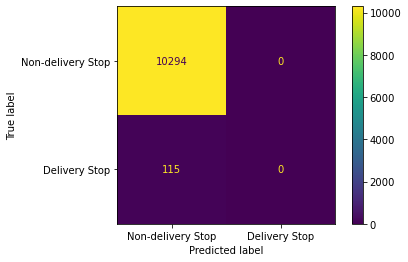

In [13]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      Y_test,
                      values_format='d',
                      # yticks_rotation= 'vertical',
                      display_labels=['Non-delivery Stop', 'Delivery Stop'])

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svm, X, Y, cv=10)
print(scores)

In [14]:
print(clf_svm.predict(X_test_scaled))

[0 0 0 ... 0 0 0]


In [15]:
print(X_test_scaled.shape)

(10409, 3)


In [16]:
print(clf_svm.predict(X_test_scaled).shape)

(10409,)


In [17]:
print("Train Set: ", clf_svm.score(X_train_scaled, Y_train))
print("Test Set: ", clf_svm.score(X_test_scaled, Y_test))

Train Set:  0.9879587523217831
Test Set:  0.9889518685752714


In [18]:
from sklearn.metrics import accuracy_score
tra_label = clf_svm.predict(X_train_scaled)
tes_label = clf_svm.predict(X_test_scaled)
print("Train Set: ", accuracy_score(Y_train, tra_label))
print("Test Set: ", accuracy_score(Y_test, tes_label))

Train Set:  0.9879587523217831
Test Set:  0.9889518685752714


## Try KCV

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svm, X, Y, cv=10)
print(scores)

# https://stackoverflow.com/questions/47663694/how-to-run-svc-classifier-after-running-10-fold-cross-validation-in-sklearn

## Try 2: Penalized-SVM / Cost-Sensitive  
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

In [ ]:
# load library
from sklearn.svm import SVC


In [ ]:
# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)


In [ ]:
svc_model.fit(x_train, y_train)

In [ ]:
svc_predict = svc_model.predict(x_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

In [ ]:
# Build your classifier
classifier = svm.SVC()

# Train it on the entire training data set
classifier.fit(X_train, y_train)

# Get predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

Is this the same with 
clf_svm.score ?  
但是这个没有交叉验证


## Optimise Parameters with Cross Validation

In [19]:
param_grid = [
    {'C': [0.5, 1, 10, 1000],  # Values for C must be > 0
     'gamma': ['scale', 1, 0.1, 0.001, 0.0001],
     'kernel': ['rbf', 'linear', 'poly']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,  # fold of cross validation
    scoring='accuracy',  # default: slightly improved but hardly
    # other scoring options: 
    # 'balanced_accuracy', slightly improved but hardly
    # 'f1', terrible
    # 'f1_micro', slightly improved but hardly
    # 'f1_macro', same as default
    # 'f1_weighted', same as default
    # 'roc_auc', terrible
    verbose=0  # set verbose=2, if want to see what grid search is doing
)

In [ ]:
optimal_params.fit(X_train_scaled, Y_train)
print(optimal_params.best_params_)

## Plot optimised result

In [ ]:
# Plot optimised result
clf_svm = SVC(random_state=42, C=0.5, gamma=0.1, kernel='rbf')  # based on the result of optimisation
clf_svm.fit(X_train_scaled, Y_train)
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      Y_test,
                      values_format='d',
                      # yticks_rotation= 'vertical',
                      display_labels=['Non-delivery Stop', 'Delivery Stop'])
plt.show()

In [ ]:
print("Train Set Performance", clf_svm.score(X_train_scaled, Y_train))
print("Test Set Performance", clf_svm.score(X_test_scaled, Y_test))

Imbalanced dataset and svm
https://www.youtube.com/watch?v=jbY0jJD1oC8

